In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy import stats
from functools import partial

In [3]:
# Set parameters
a,b,c = 0.1,1.5,-2.0

In [4]:
# Load all data
τ2_rejection_full_data = np.loadtxt("../data/%.6f_%.6f_%.6f_simpleTruncexpon_rejection.dat"%(a,b,c))
τ2_direct_full_data = np.loadtxt("../data/%.6f_%.6f_%.6f_simpleTruncexpon_direct.dat"%(a,b,c))

In [5]:
# Get total number of samples in data
num_samples_data = τ2_rejection_full_data.shape[0]
print("There are a total of %d samples in the full data set."%num_samples_data)

There are a total of 1000000 samples in the full data set.


In [6]:
# Set start index (i.e, how many samples will be thrownaway due to equilibration)
equil_percent = 0.2
start = int(num_samples_data*equil_percent)

print("The %d first samples will be thrown away for equilibration."%start)

The 200000 first samples will be thrown away for equilibration.


In [7]:
# Set number of desired samples to use
num_samples = num_samples_data-start

print("There are a total of %d samples left in the data set after equilibration."%(num_samples))

There are a total of 800000 samples left in the data set after equilibration.


In [8]:
τ2_rejection = τ2_rejection_full_data[start:]
τ2_direct = τ2_direct_full_data[start:]

In [9]:
def P(τ,a,b,c):
    Z = (np.exp(c*(b-a))-1)/c
    return (1/Z)*np.exp(c*(τ-a));

def cdf(τ,a,b,c):
    Z = (np.exp(c*(b-a))-1)/c
    return (np.exp(c*(τ-a))-1)/(c*Z)

def P_times_tau(τ,a,b,c):
    Z = (np.exp(c*(b-a))-1)/c
    return τ*(1/Z)*np.exp(c*(τ-a));

In [10]:
cdf_fixed = partial(cdf,a=a,b=b,c=c)

In [11]:
τ_fit = np.linspace(a,b,1000)

### Compute average time from exact and sampled distributions

In [12]:
# Compute "exact" average of time
τ_mean_exact = integrate.quad(P_times_tau,a,b,args=(a,b,c))
print("Average time (exact): ",τ_mean_exact)

Average time (exact):  (0.5093537054780725, 5.654962114998968e-15)


In [13]:
# Compute average time from histogram
τ2_counts, τ2_edges = np.histogram(τ2_rejection,bins=1000)
τ2_probs = np.divide(τ2_counts,np.sum(τ2_counts))

τ_mean_rejection = np.sum(τ2_probs*τ2_edges[:-1])
print("Average sampled time with rejection: ",τ_mean_rejection)

Average sampled time with rejection:  0.5082187425969835


In [14]:
# Compute average time from histogram
τ2_counts, τ2_edges = np.histogram(τ2_direct,bins=1000)
τ2_probs = np.divide(τ2_counts,np.sum(τ2_counts))

τ_mean_direct = np.sum(τ2_probs*τ2_edges[:-1])
print("Average sampled time with direct: ",np.sum(τ2_probs*τ2_edges[:-1]))

Average sampled time with direct:  0.5079243385958052


In [15]:
rejection_error = np.abs((τ_mean_exact - τ_mean_rejection) / τ_mean_exact)[0]
direct_error = np.abs((τ_mean_exact - τ_mean_direct) / τ_mean_exact)[0]

print("Rejection Error: %.6f"%(rejection_error))
print("Direct Error: %.6f"%(direct_error))

Rejection Error: 0.002228
Direct Error: 0.002806


### Rejection vs Direct sampling $\tau$ from simple exponential distribution

In [15]:
colors = ['salmon','dodgerblue','mediumseagreen']
colors = ['#FFA0A0','#1e90ff','#9370da']
colors_light = ['#fecfcf','#8ec7fe','#c8b7ec']

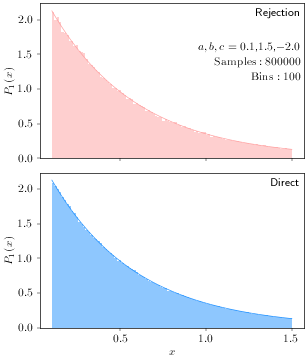

In [39]:
with plt.style.context('../IOP_large.mplstyle'):

    fig,ax = plt.subplots(2,1, dpi=100,sharey=True,constrained_layout=True, sharex=True,figsize=[3.083,1.9*1.905]);
    
    num_bins = 100

    # Plot
    kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

    ax[0].plot(τ_fit,P(τ_fit,a,b,c),color=colors[0],alpha=1.0)
    ax[0].hist(τ2_rejection, density=True, bins=num_bins,label=r'$\rm{Rejection}$',color=colors_light[0], edgecolor='w', lw=0.01)  # density=False would make counts
    ax[0].set_ylabel(r'$P_1(x)$');
    ax[0].annotate(r"Rejection",(0.99,0.92),
                    xycoords='axes fraction', ha='right')
    ax[0].annotate(r"$a,b,c = %.1f$,$%.1f$,$%.1f$"%(a,b,c),(0.99,0.7),
                    xycoords='axes fraction', ha='right')
    ax[0].annotate(r"$\rm{Samples: %d}$"%num_samples,(0.99,0.6),
                    xycoords='axes fraction', ha='right')
    ax[0].annotate(r"$\rm{Bins: %d}$"%num_bins,(0.99,0.5),
                    xycoords='axes fraction', ha='right')

    ax[1].plot(τ_fit,P(τ_fit,a,b,c),color=colors[1],alpha=1.0)
    ax[1].hist(τ2_direct, density=True, bins=num_bins,label=r'$\rm{Direct}$',color=colors_light[1], edgecolor='w', lw=0.01);  # density=False would make counts
    ax[1].set_ylabel(r'$P_1(x)$');
    ax[1].set_xlabel(r'$x$');
    ax[1].annotate(r"Direct",(0.99,0.92),
                    xycoords='axes fraction', ha='right')

    plt.savefig("../figures/simple_truncexpon_histogram_benchmark.pdf")

In [17]:
# Check normalization
integrate.quad(P,a,b,args=(a,b,c))

(0.9999999999999998, 1.1102230246251562e-14)